NumPy is not using Intel MKL.
Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')
   customer_id  credit_score country  gender  age  tenure    balance  \
0     15634602           619  France  Female   42       2       0.00   
1     15647311           608   Spain  Female   41       1   83807.86   
2     15619304           502  France  Female   42       8  159660.80   
3     15701354           699  France  Female   39       1       0.00   
4     15737888           850   Spain  Female   43       2  125510.82   

   products_number  credit_card  active_member  estimated_salary  churn  
0                1            1              1         101348.88      1  
1                1            0              1         112542.58      0  
2                3            1              0         113931.57      1  
3                2            0      

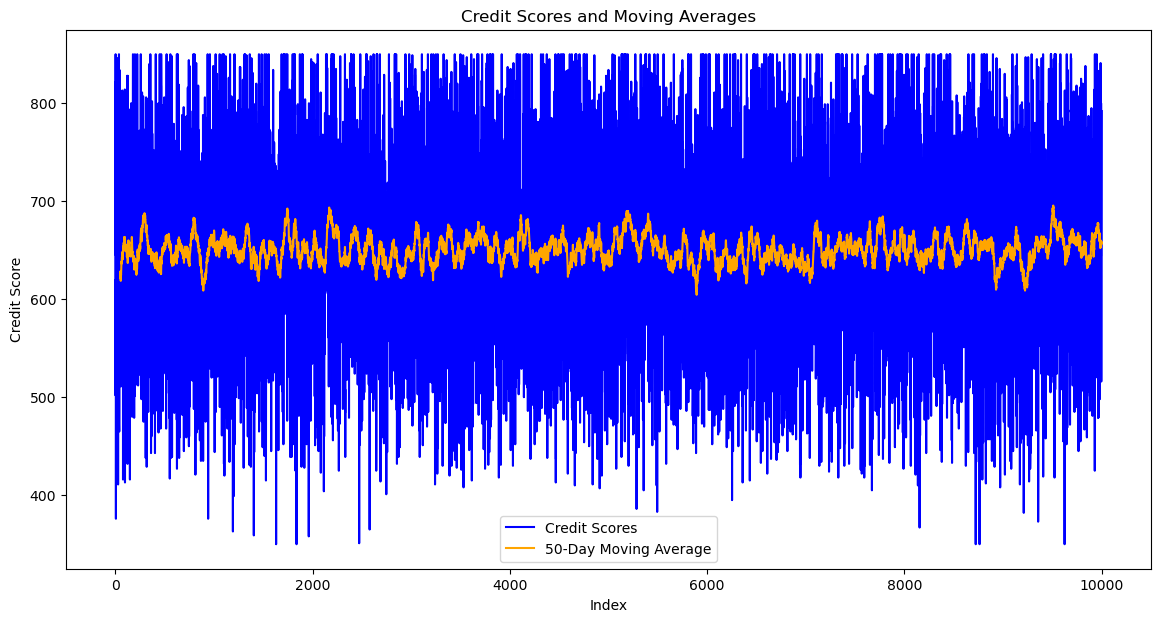

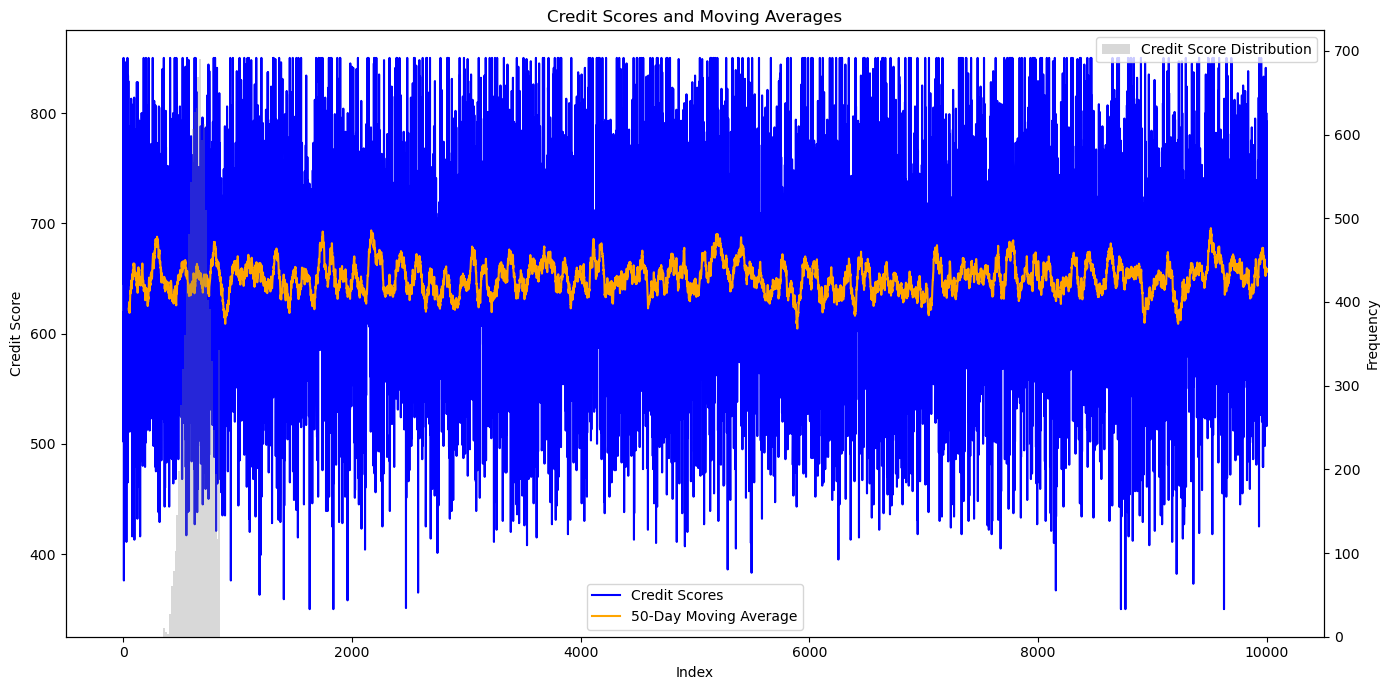

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Check if NumPy is using Intel MKL
def check_mkl():
    if np.__config__.get_info('blas_mkl_info'):
        print("NumPy is using Intel MKL.")
    else:
        print("NumPy is not using Intel MKL.")

check_mkl()

# Load the dataset
data = pd.read_csv('/Users/karanpandre/Documents/INTERNSHIP/HPC /case_study(28/6)/bank_customer.csv')

# Display the column names and the first few rows of the dataset
print(data.columns)
print(data.head())

# Check for missing values
print(data.isnull().sum())

# Extract the credit scores
credit_scores = data['credit_score'].values  # Assuming 'credit_score' is the relevant column for analysis

# Define the window size for the moving average
window_size = 50

# Function to compute moving averages using NumPy
def compute_moving_averages(data, window_size):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

# Calculate the moving averages
moving_averages = compute_moving_averages(credit_scores, window_size)

# Add the moving averages to the dataframe
data['Moving_Average'] = np.nan
data.iloc[window_size-1:, data.columns.get_loc('Moving_Average')] = moving_averages

# Plot the original credit scores and the moving averages
plt.figure(figsize=(14, 7))
plt.plot(data.index, credit_scores, label='Credit Scores', color='blue')
plt.plot(data.index[window_size-1:], moving_averages, label=f'{window_size}-Day Moving Average', color='orange')
plt.xlabel('Index')
plt.ylabel('Credit Score')
plt.title('Credit Scores and Moving Averages')
plt.legend()
plt.show()

# Create a figure with two subplots
fig, ax1 = plt.subplots(figsize=(14, 7))

# Plot the credit scores and moving average
ax1.plot(data.index, credit_scores, label='Credit Scores', color='blue')
ax1.plot(data.index[window_size-1:], moving_averages, label=f'{window_size}-Day Moving Average', color='orange')
ax1.set_xlabel('Index')
ax1.set_ylabel('Credit Score')
ax1.set_title('Credit Scores and Moving Averages')
ax1.legend()

# Create a second y-axis for the histogram
ax2 = ax1.twinx()
ax2.hist(credit_scores, bins=30, alpha=0.3, color='gray', label='Credit Score Distribution')
ax2.set_ylabel('Frequency')

# Add a legend for the histogram
ax2.legend(loc='upper right')

plt.tight_layout()
plt.show()
